# Desafio: emissão por setor econômico

Uma das tarefas passadas pela equipe de supervisão do órgão ambiental era de encontrar a emissão média de cada gás por ano. Conseguimos realizar essa tarefa usando o método groupby() e pivot_table() para gerar uma tabela contendo a emissão ao longo dos anos para cada um dos gases.

A equipe de supervisão deseja saber agora a média de emissão para cada um dos setores econômicos da coluna "Nível 1 - Setor" ao longo dos anos. Como desafio, crie uma tabela de pivô e uma visualização gráfica contendo essas informações, utilizando apenas o método pivot_table para a construção da tabela, sem utilizar o método groupby.


In [22]:
import pandas as pd 
emissoes_gases = pd.read_excel('1-SEEG10_GERAL-BR_UF_2022.10.27-FINAL-SITE.xlsx', sheet_name = 'GEE Estados')
emissoes_gases = emissoes_gases[emissoes_gases['Emissão / Remoção / Bunker'] == 'Emissão']
emissoes_gases.head()


/home/wsl/.local/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Emissão / Remoção / Bunker,Gás,Estado,Atividade Econômica,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,Emissão,COVNM (t),SP,OUTRA_IND,...,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,N2O (t),SP,OUTRA_IND,...,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO (t),SP,OUTRA_IND,...,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,NOx (t),SP,OUTRA_IND,...,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO2e (t) GWP-AR2,SP,OUTRA_IND,...,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000


In [23]:
colunas_info = list(emissoes_gases.loc[:,'Nível 1 - Setor':'Produto'].columns)
colunas_emissao = list(emissoes_gases.loc[:,1970:2021].columns)
emissoes_por_ano = emissoes_gases.melt(id_vars = colunas_info, value_vars = colunas_emissao, var_name = 'Ano' , value_name = 'Emissão')
emissoes_por_ano

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Emissão / Remoção / Bunker,Gás,Estado,Atividade Econômica,Produto,Ano,Emissão
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,Emissão,COVNM (t),SP,OUTRA_IND,NaN,1970,0.0
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,N2O (t),SP,OUTRA_IND,NaN,1970,6210.0
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO (t),SP,OUTRA_IND,NaN,1970,368.0
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,NOx (t),SP,OUTRA_IND,NaN,1970,115.0
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO2e (t) GWP-AR2,SP,OUTRA_IND,NaN,1970,1925100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4926891,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,Emissão,CO2e (t) GWP-AR5,MS,AGROPEC,NaN,2021,1004191.0
4926892,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,Emissão,CO2e (t) GWP-AR6,MT,AGROPEC,NaN,2021,443120.0
4926893,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,Emissão,CO2e (t) GWP-AR6,MS,AGROPEC,NaN,2021,1009968.0
4926894,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,Emissão,N2O (t),MT,AGROPEC,NaN,2021,479.0


In [24]:
emissoes_por_setor = emissoes_por_ano.pivot_table(index = "Ano", columns = 'Nível 1 - Setor', values = 'Emissão', aggfunc = 'mean')
emissoes_por_setor

Nível 1 - Setor,Agropecuária,Energia,Mudança de Uso da Terra e Floresta,Processos Industriais,Resíduos
Ano,,,,,
1970,49292.425313,15939.703116,0.000000e+00,106549.168676,11684.883558
1971,51199.559433,17698.989894,0.000000e+00,111532.507753,12676.706849
1972,53508.935498,19092.876761,0.000000e+00,125701.525455,13709.697850
1973,55494.006224,22062.085929,0.000000e+00,137657.110402,14715.248028
1974,57896.513900,23810.659474,0.000000e+00,149941.779638,15710.616150
1975,63303.098508,25036.433686,0.000000e+00,168471.860169,16667.446706
1976,66347.533521,27214.281091,0.000000e+00,193826.482068,17539.505222
1977,66977.413505,27645.258640,0.000000e+00,231505.609283,18462.455148
1978,66640.432009,29734.461056,0.000000e+00,255736.210711,19327.840165


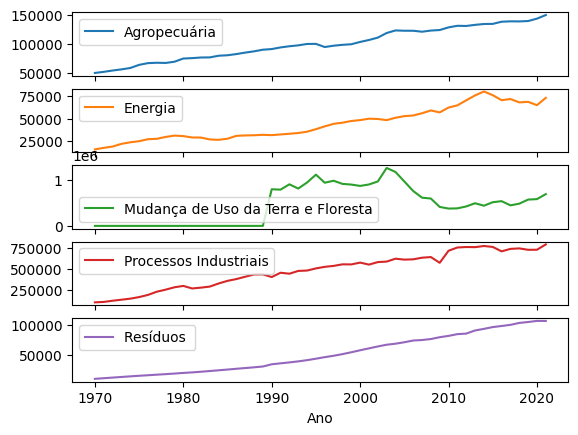

In [25]:
emissoes_por_setor.plot(subplots=True);


# Desafio: hora da prática

Chegou o momento de praticar! Vamos aplicar os conceitos aprendidos durante a aula a partir de algumas atividades. Solucione os problemas propostos através de códigos utilizando a base de dados disponibilizada no curso.

1) Faça um agrupamento de dados com as colunas "Estado" e "Nível 1 - Setor", obtendo a soma de emissão e armazenando o resultado em uma tabela.

In [35]:
emissoes_por_estado_e_setor = emissoes_por_ano.groupby(['Estado','Nível 1 - Setor'])[["Emissão"]].sum()
emissoes_por_estado_e_setor 

Emissão
Estado Nível 1 - Setor                                 
AC     Agropecuária                        7.270206e+08
       Energia                             2.071751e+08
       Mudança de Uso da Terra e Floresta  7.847879e+09
       Resíduos                            2.928323e+07
AL     Agropecuária                        7.628303e+08
...                                                 ...
TO     Agropecuária                        2.762475e+09
       Energia                             5.130379e+08
       Mudança de Uso da Terra e Floresta  9.435591e+09
       Processos Industriais               2.613905e+07
       Resíduos                            6.177003e+07

[132 rows x 1 columns]

2) Utilizando a tabela construída na atividade 1, selecione os dados referentes à "Energia" do índice "Nível 1 - Setor".

In [42]:
emissoes_por_estado_e_setor.xs('Energia', level = 1)

,Emissão
Estado,
AC,2.071751e+08
AL,5.958697e+08
AM,1.916462e+09
AP,2.638059e+08
BA,4.801368e+09
CE,1.879584e+09
DF,9.487860e+08
ES,2.201326e+09
GO,2.761709e+09


3) Utilizando a tabela construída na atividade 1, encontre a atividade econômica com valor máximo de emissão do Estado de Minas Gerais

In [47]:
emissoes_por_estado_e_setor.xs('MG', level = 0).idxmax()

Emissão    Agropecuária
dtype: object

4) Obtenha uma tabela contendo a atividade econômica com máxima emissão para cada Estado.

In [54]:
emissoes_por_estado_e_setor.groupby(level = 0).idxmax()

,Emissão
Estado,
AC,"(AC, Mudança de Uso da Terra e Floresta)"
AL,"(AL, Agropecuária)"
AM,"(AM, Mudança de Uso da Terra e Floresta)"
AP,"(AP, Mudança de Uso da Terra e Floresta)"
BA,"(BA, Mudança de Uso da Terra e Floresta)"
CE,"(CE, Energia)"
DF,"(DF, Energia)"
ES,"(ES, Processos Industriais)"
GO,"(GO, Agropecuária)"


5) Obtenha uma tabela contendo o Estado com máxima emissão para cada atividade econômica.

In [52]:
emissoes_por_estado_e_setor.swaplevel(0, 1).groupby(level = 0).idxmax()

,Emissão
Nível 1 - Setor,
Agropecuária,"(Agropecuária, MG)"
Energia,"(Energia, SP)"
Mudança de Uso da Terra e Floresta,"(Mudança de Uso da Terra e Floresta, PA)"
Processos Industriais,"(Processos Industriais, MG)"
Resíduos,"(Resíduos , SP)"


In [57]:
emissoes_por_estado_e_setor.groupby(level = 1).idxmax()

,Emissão
Nível 1 - Setor,
Agropecuária,"(MG, Agropecuária)"
Energia,"(SP, Energia)"
Mudança de Uso da Terra e Floresta,"(PA, Mudança de Uso da Terra e Floresta)"
Processos Industriais,"(MG, Processos Industriais)"
Resíduos,"(SP, Resíduos )"
